In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from vitascopic_nca.trainer import Trainer
from vitascopic_nca.config import DefaultTrainerConfig, DefaultNCAConfig_wMassCons
from tqdm.auto import tqdm
from IPython.display import display, clear_output
import panel as pn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pn.extension()

In [3]:
#config = DefaultNCAConfig_wMassCons()

config = DefaultTrainerConfig()
print(config)
trainer = Trainer(config)
trainer.sanity_check()

DefaultTrainerConfig(loss_type='mse', padding_type='circular')
Sanity check loss: 0.9000113010406494


In [4]:
#with torch.no_grad():
info = trainer.optim_step(steps=100)
display(trainer.display_optim_step(info))

BokehModel(combine_events=True, render_bundle={'docs_json': {'5c45b4a4-b505-4b49-a0bc-837a8d4b4f8e': {'version…

In [5]:
pbar = tqdm(range(10_000))
for _ in pbar:
    info = trainer.optim_step(steps=50)
    pbar.set_description(f"Loss: {info['loss']:.4f}")

    if trainer.learning_steps % 250 == 1:
        with torch.no_grad():
            info = trainer.optim_step(steps=50)

        clear_output(wait=True)
        display(pbar.container)
        display(trainer.display_optim_step(info))



Loss: 0.1358: 100%|#########9| 9997/10000 [06:31<00:00, 28.64it/s]

BokehModel(combine_events=True, render_bundle={'docs_json': {'6b3e65f8-fcae-4aa1-b64c-6b6fabeabecd': {'version…

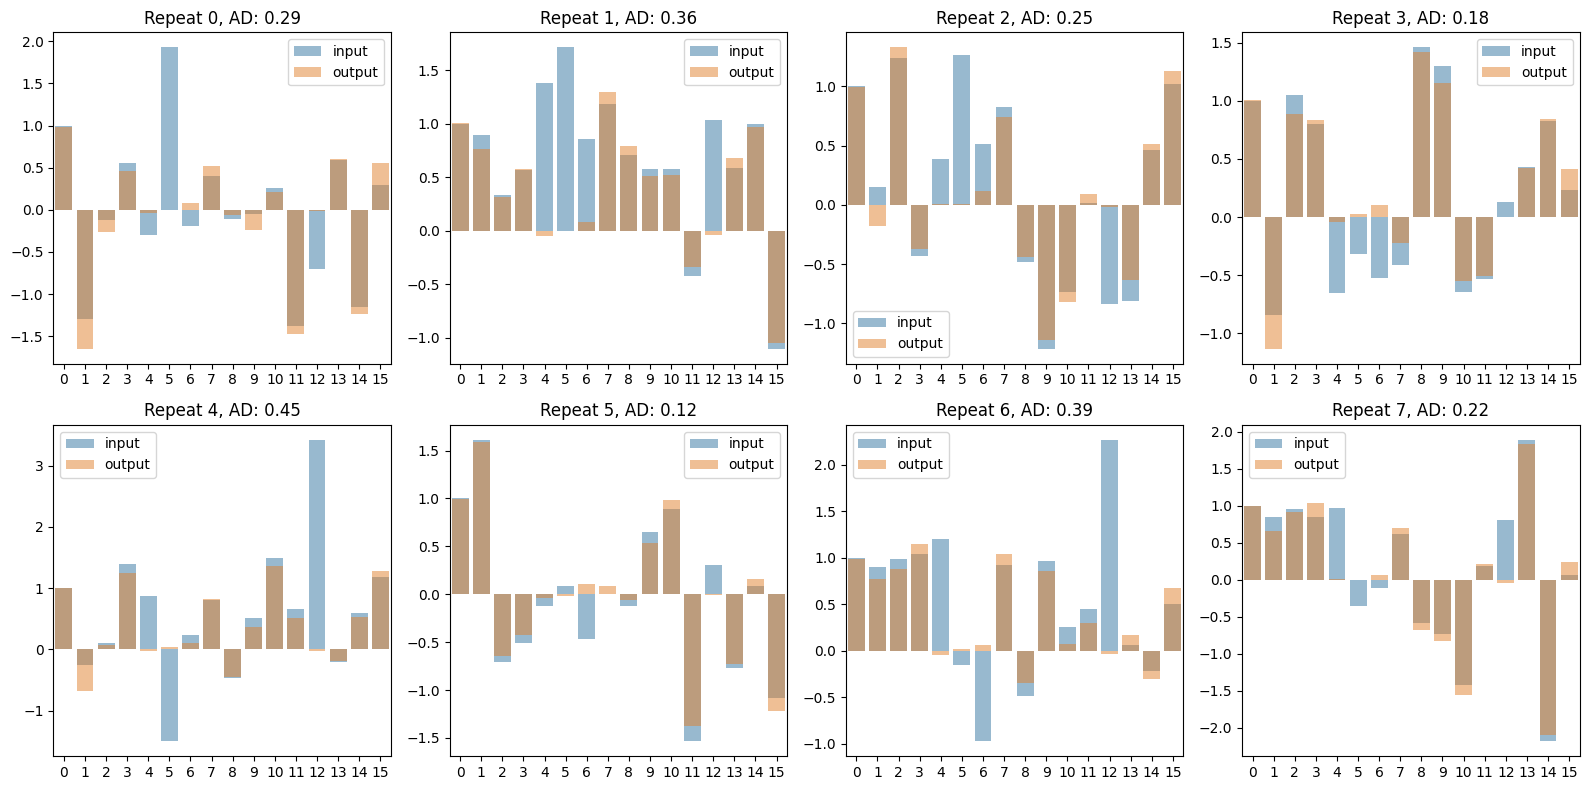

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(8):
    input_arr = np.array(info["input_msg"][i, :])
    output_arr = np.array(info["output_msg"][i, :])

    sns.barplot(input_arr, ax=axes[i], label='input', fill=True, alpha=0.5)
    sns.barplot(output_arr, ax=axes[i], label='output', fill=True, alpha=0.5)
    
    ave_diff = np.abs(input_arr - output_arr).sum() / output_arr.shape[0]
    axes[i].set_title(f'Repeat {i}, AD: {ave_diff:.2f}')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

In [8]:
diffs=[]
for i in range(8):
    diffs.append(np.abs(info["output_msg"][i, :] - info["input_msg"][i, :]))

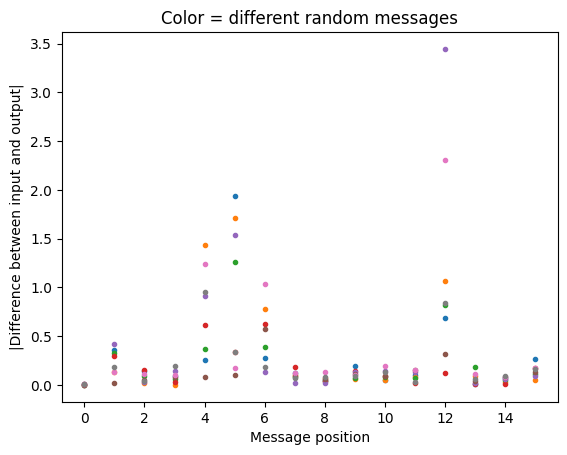

In [16]:
plt.plot(np.array(diffs).T, ".")
plt.xlabel("Message position")
plt.ylabel("|Difference between input and output|")
plt.title("Color = different random messages")
plt.show()